# **Resumen:**

La diabetes es un trastorno metabólico crónico que no ha hecho mas que aumentar constantemente. Su detección temprana es crucial para un manejo efectivo y la prevención de complicaciones. Este estudio tiene como objetivo desarrollar un modelo predictivo para identificar a personas con diabetes utilizando un conjunto diverso de variables relacionadas con la salud.

 El conjunto de datos utilizado para este análisis fue extraido de la pagina www.kaggle.com y contiene información recopilada de una gran cantidad de individuos de diferentes grupos de edad. La variable principal de interés es "Diabetes_012" que está categorizada en tres clases: 0 para "No diabetes", 1 para "Prediabetes" y 2 para "Diabetes". También se consideran varios otros factores como posibles predictores, tales como "HighBP" (presión arterial alta), "HighChol" (colesterol alto), "CholCheck" (control de colesterol), "BMI" (Índice de masa corporal), "Smoker" (fumador), "Stroke" (derrame cerebral), "HeartDiseaseorAttack" (enfermedad coronaria o ataque cardíaco), "PhysActivity" (actividad física), "Fruits" (consumo de frutas), "Veggies" (consumo de verduras), "HvyAlcoholConsump" (consumo excesivo de alcohol), "AnyHealthcare" (cobertura de atención médica) y "NoDocbcCost" (dificultades para ver a un médico debido al costo), entre otros.


# **Hipótesis**

**Hipótesis/Pregunta 1:** ¿Existe una asociación significativa entre el índice de masa corporal (BMI) y el desarrollo de diabetes en la población estudiada?
Con la siguiente hipótesis buscamos comprender si hay una relación entre el índice de masa corporal de las personas y su probabilidad de tener diabetes.

**Hipótesis/Pregunta 2:** ¿Las personas que consumen frutas y verduras con mayor frecuencia tienen una menor probabilidad de desarrollar diabetes?
Esta pregunta explora la posible influencia del consumo de frutas y verduras en la prevención de la diabetes.


**Hipótesis/Pregunta 3:** ¿El nivel de educación y el nivel de ingresos están relacionados con la probabilidad de tener diabetes en la población analizada?
Esta hipótesis busca explorar si existe una asociación entre el nivel de educación y el nivel de ingresos de las personas con su probabilidad de desarrollar diabetes.

**Hipótesis/Pregunta 4:** ¿Las personas que han tenido un derrame cerebral o padecen enfermedades coronarias tienen una mayor incidencia de diabetes?
Con esta última Hipótesis buscaremos investigar si existe una asociación entre antecedentes de derrame cerebral o enfermedades coronarias y la presencia de diabetes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
Diabetes_dataset = '/content/drive/MyDrive/ProyectoCoderDS/diabetes_012_health_indicators_BRFSS2015.csv'
df_diabetes = pd.read_csv(Diabetes_dataset)

In [ ]:
df_diabetes.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

# **Relación entre diabetes y presión alta**

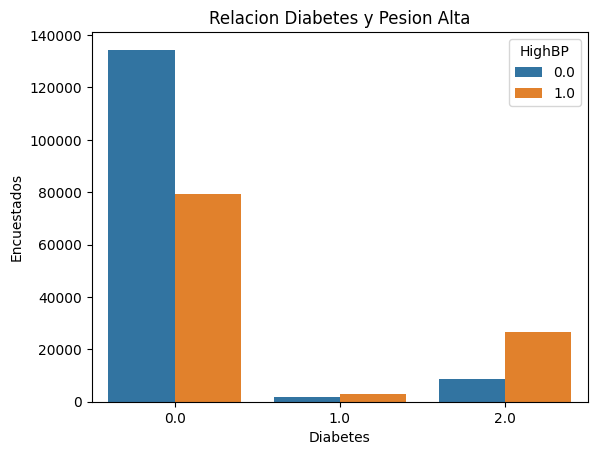

In [ ]:
# Agrupar los datos de Diabetes_012 y HighBP
grouped_data = df_diabetes.groupby(['Diabetes_012', 'HighBP']).size().reset_index(name='Encuestados')

# Creamos un gráfico de barras agrupadas para visualizar la relación
sns.barplot(data = grouped_data, x='Diabetes_012', y='Encuestados', hue='HighBP')
plt.xlabel('Diabetes')
plt.ylabel('Encuestados')
plt.title('Relacion Diabetes y Pesion Alta')
plt.show()

Con este histograma podemos observar las edades de los encuestados y como de distribuyen con respecto a la totalidad de los encuestados

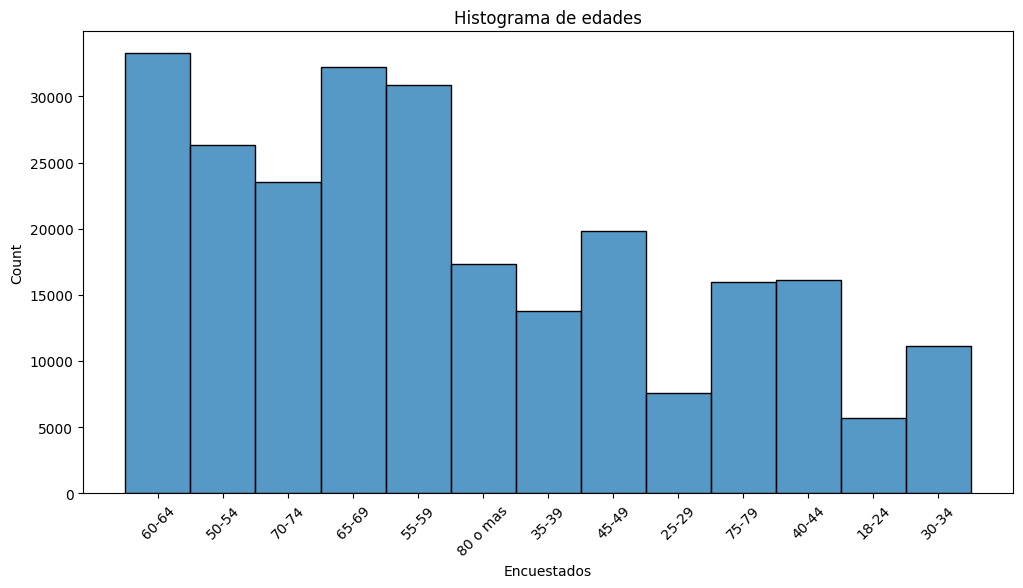

In [ ]:
#Reemplazamos los valores de la variable 'Age' con su respectivo significado
age_map = {1 : '18-24', 2 : '25-29', 3 : '30-34', 4 : '35-39', 5 : '40-44', 6 : '45-49', 7 : '50-54',
           8 : '55-59', 9 : '60-64', 10 : '65-69', 11 :  '70-74', 12 : '75-79', 13 : '80 o mas'}

#Aplicamos el cambio al df
df_diabetes ['Age'] = df_diabetes['Age'].replace(age_map)

# Creamos el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_diabetes, x='Age', bins=len(age_map), edgecolor='black')
plt.xlabel('Encuestados')
plt.title('Histograma de edades')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

En este gráfico de caja podemos ver que hay una gran cantidad de datos que son outliers positivos, una hipótesis podría ser que hay una gran cantidad de encuestados que sufren obesidad.

Por otra parte, si analizamos los datos más a detalle podemos ver que hay valores que son bastante irreales, por ejemplo los que pasan de 60. Esto podría indicarnos que hay gran cantidad de valores erróneos.

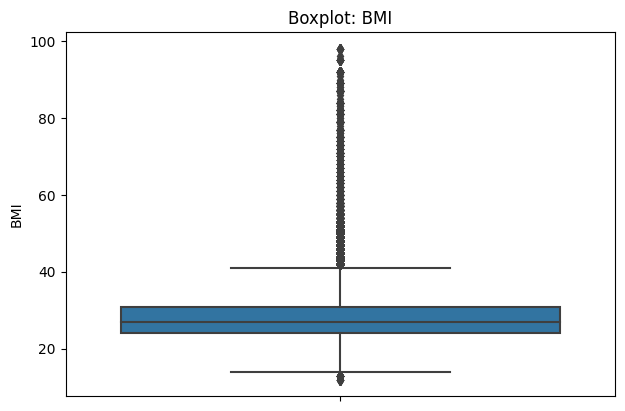

In [ ]:
# Boxplot para BMI
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=df_diabetes, y='BMI')
plt.ylabel('BMI')
plt.title('Boxplot: BMI')
plt.tight_layout()
plt.show()

Con el siguiente grafico de torta vemos la proporcion de diabeticos, prediabeticos y no diabeticos con respecto a la totalidad de los encuestados

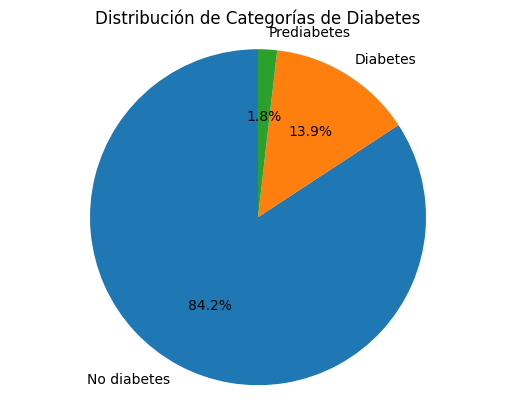

In [ ]:
# Cambiamos los valores numericos de la variable "Diabetes_012"
diabetes_map = {0: 'No diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
df_diabetes['Diabetes_012'] = df_diabetes['Diabetes_012'].replace(diabetes_map)

# Calculo de los conteos de cada categoría en la columna 'Diabetes_012'
diabetes_counts = df_diabetes['Diabetes_012'].value_counts()

# Crear un gráfico de torta
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.title('Distribución de Categorías de Diabetes')
plt.show()

En el siguiente grafico podemos observar que mas de la mitad de los encuestados con diabetes y prediabetes son No fumadores pero no tomaria esta relacion como algo muy fiable teniendo en cuenta que el consumo excesivo de nicotina es una variable que podria ayudar a la aparicion de esta enfermedad

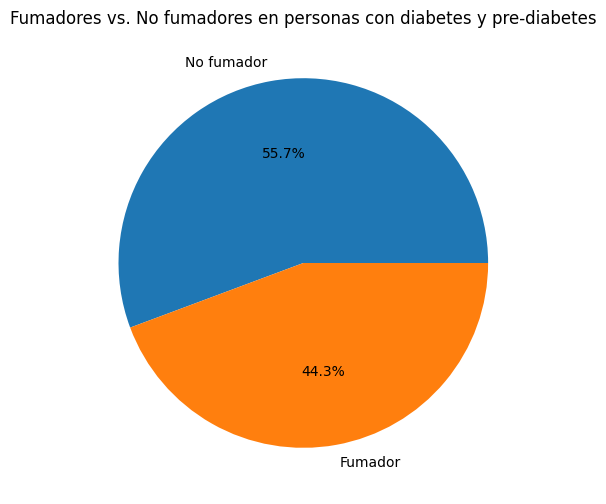

In [ ]:
# Filtramos el DataFrame para personas con diabetes y pre-diabetes
df_diabetes2 = df_diabetes[df_diabetes['Diabetes_012'].isin([1, 2])]

# Cambiamos los valores numericos de la variable "Smoker"
smoker_map = {0: 'No fumador', 1: 'Fumador'}
df_diabetes['Smoker'] = df_diabetes['Smoker'].replace(smoker_map)

# Contar la cantidad de personas fumadoras y no fumadoras con diabetes y pre-diabetes
smoker_counts = df_diabetes['Smoker'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Fumadores vs. No fumadores en personas con diabetes y pre-diabetes')
plt.show()

En el siguiente grafio podemos ver la relacion entre algunas variables relacionadas a habitos y calidad de vida con respecto a la totlidad de los encuestados

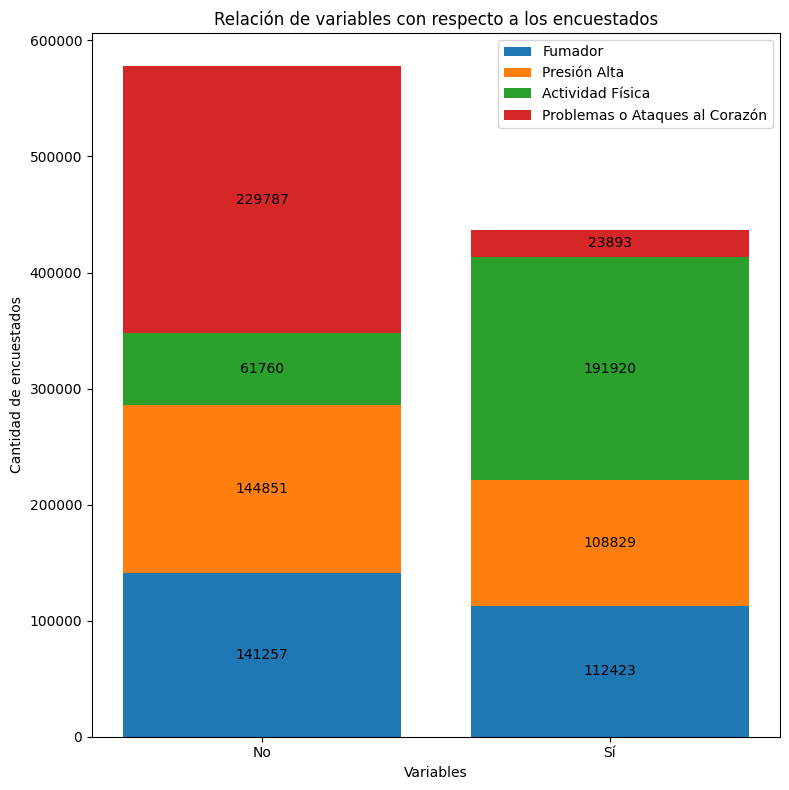

In [ ]:
# Calculamos la cantidad de encuestados en cada categoría
total_encuestados = len(df_diabetes)

smoker_counts = df_diabetes['Smoker'].value_counts()
highbp_counts = df_diabetes['HighBP'].value_counts()
physactivity_counts = df_diabetes['PhysActivity'].value_counts()
heartdisease_counts = df_diabetes['HeartDiseaseorAttack'].value_counts()

# Creamos el gráfico de barras
x_labels = ['No', 'Sí']
x = range(len(x_labels))

fig, ax = plt.subplots(figsize=(8, 8))

# Barra de Fumador
bar1 = ax.bar(x, [smoker_counts[0], smoker_counts[1]], label='Fumador')

# Barra de Presión Alta
bar2 = ax.bar(x, [highbp_counts[0], highbp_counts[1]], bottom=[smoker_counts[0],
 smoker_counts[1]], label='Presión Alta')

# Barra de Actividad Física
bar3 = ax.bar(x, [physactivity_counts[0], physactivity_counts[1]],
bottom=[smoker_counts[0] + highbp_counts[0], smoker_counts[1] +
highbp_counts[1]], label='Actividad Física')

# Barra de Problemas o Ataques al Corazón
bar4 = ax.bar(x, [heartdisease_counts[0], heartdisease_counts[1]],
bottom=[smoker_counts[0] + highbp_counts[0] + physactivity_counts[0],
smoker_counts[1] + highbp_counts[1] + physactivity_counts[1]], label='Problemas o Ataques al Corazón')

# Añadir etiquetas a las barras
ax.bar_label(bar1, label_type='center')
ax.bar_label(bar2, label_type='center')
ax.bar_label(bar3, label_type='center')
ax.bar_label(bar4, label_type='center')

# Añadir etiquetas a los ejes x e y
ax.set_xlabel('Variables')
ax.set_ylabel('Cantidad de encuestados')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Añadir título al gráfico
ax.set_title('Relación de variables con respecto a los encuestados')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico de barras
plt.tight_layout()
plt.show()